In [ ]:
# splitting the video into frames
!unzip -q /content/drive/MyDrive/Dataset/Inference_frames.zip

# Import libraries

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os

# Dataset creation

## Convert a video to frames

In [ ]:
!ffmpeg -i "/content/Read.mp4" -vf fps=15 "Read/inf%04d.png"

# Pre-processing

## Read a image

(360, 640, 3)


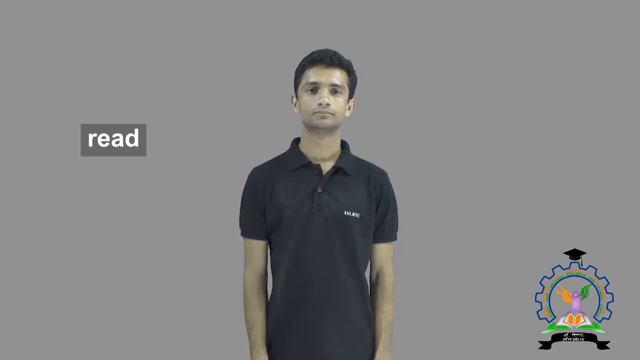

In [ ]:
image_1 = cv2.imread("/content/Read/inf0002.png")

print(image_1.shape)

cv2_imshow(image_1)

## Cropping and resizing

(360, 640, 3)


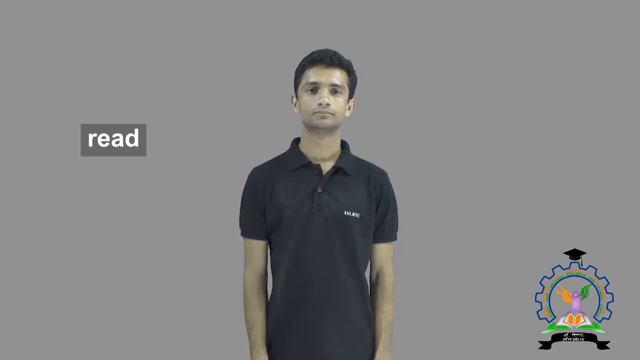

(360, 280, 3)


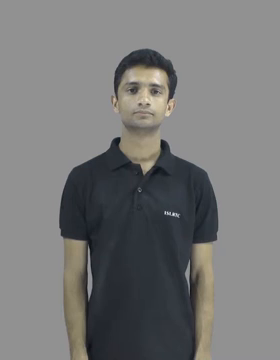

(256, 256, 3)


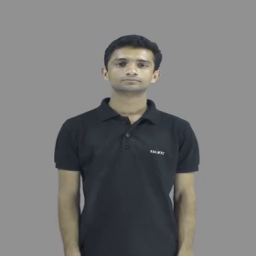

In [ ]:
image_1 = cv2.imread("/content/Read/inf0002.png")

print(image_1.shape)

cv2_imshow(image_1)

image_1_crp = image_1[:,180:460] # we are using array indexing to crop an image

print(image_1_crp.shape)

cv2_imshow(image_1_crp)

image_1_resize = cv2.resize(image_1_crp,(256,256))

print(image_1_resize.shape)

cv2_imshow(image_1_resize)

## Convert to BW

In [ ]:
image_1 = cv2.imread("/content/Read/inf0002.png")



image_1_b_w = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY )

print(image_1_b_w.shape)

cv2_imshow(image_1_b_w)

## Take absdiff

In [ ]:
image_1 = cv2.imread("/content/Read/inf0001.png")
image_2 = cv2.imread("/content/Read/inf0024.png")

image_1_b_w = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY )
image_2_b_w = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY )

absdiff = cv2.absdiff(image_1_b_w,image_2_b_w)

cv2_imshow(absdiff)

## Rotate image

In [ ]:
image_1 = cv2.imread("/content/Read/inf0024.png")

def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

image_1_rot = rotate_image(image_1,25)

cv2_imshow(image_1_rot)

### Flip image

In [ ]:
image_1 = cv2.imread("/content/Read/inf0024.png")

image_1_flip = cv2.flip(image_1,3)

cv2_imshow(image_1_flip)

# Looping through the files in a folder

In [ ]:
frame_dir = "/content/Read"

frame_dir_lst = os.listdir(frame_dir)

frame_dir_lst.sort()

output_dir = "/content/Read_prep"

if not os.path.exists(output_dir):
  os.mkdir(output_dir)

for image_nm in frame_dir_lst:
  print(os.path.join(frame_dir,image_nm))

  img = cv2.imread(os.path.join(frame_dir,image_nm))
  cv2.imwrite(os.path.join(output_dir,image_nm),img)

In [ ]:
!zip -r -q Read_prep.zip Read_prep

In [ ]:
import os
import cv2

frame_dir = "/content/Inference_frames/inf_videos/v1 (10)"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "Final"
k = 10
if not os.path.exists(output_dir+str(k)):
  os.mkdir(output_dir+str(k))
for i in range(len(frame_dir_lst)):

  image_1 = cv2.imread(os.path.join(frame_dir,frame_dir_lst[i]))
  image_2 = cv2.imread(os.path.join(frame_dir,frame_dir_lst[i+1]))

  image_1_b_w = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY )
  image_2_b_w = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY )

  absdiff = cv2.absdiff(image_1_b_w,image_2_b_w)
  cv2.imwrite(os.path.join(output_dir+str(k),frame_dir_lst[i]),absdiff)

In [ ]:
!zip -r -q Inference_absdiff.zip Inference_absdiff